이미지데이터는 오토인코더 보다 CNN의 성능이 더 좋답

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import seaborn as sns

np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
# 데이터 로드 및 전처리 (MNIST 데이터셋 사용 예시)
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 오토인코더 모델 정의
encoding_dim = 32  # 인코딩 차원
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [ ]:
# 모델 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 12s 22ms/step - loss: 0.2278 - val_loss: 0.1579
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.1417 - val_loss: 0.1264
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1188 - val_loss: 0.1103
Epoch 4/30
469/469 [==============================] - 5s 11ms/step - loss: 0.1074 - val_loss: 0.1024
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1011 - val_loss: 0.0977
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0975 - val_loss: 0.0950
Epoch 7/30
320/469 [===================>..........] - ETA: 1s - loss: 0.0958

313/313 [==============================] - 0s 1ms/step


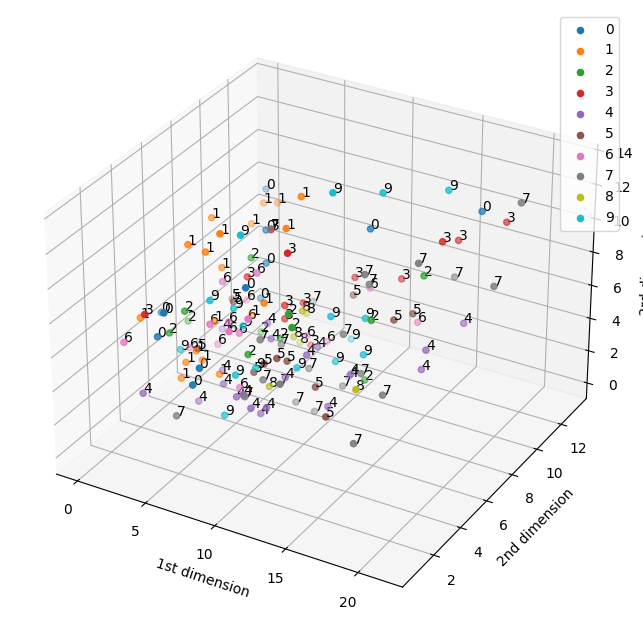

In [ ]:
# 인코더 부분 변경하여 3차원 벡터 생성
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# 시각화는 150개의 데이터로 제한
num_visualize = 150
encoded_imgs = encoded_imgs[:num_visualize]
y_test = y_test[:num_visualize]

# 각 숫자에 해당하는 데이터 추출 및 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 숫자에 해당하는 데이터를 추출하고 색상과 레이블을 지정하여 시각화
for digit in range(10):
    digit_indices = np.where(y_test == digit)[0]
    ax.scatter(encoded_imgs[digit_indices, 0], encoded_imgs[digit_indices, 1], encoded_imgs[digit_indices, 2], label=str(digit))
    for i in digit_indices:
        ax.text(encoded_imgs[i, 0], encoded_imgs[i, 1], encoded_imgs[i, 2], str(digit))

ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_zlabel('3rd dimension')
ax.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


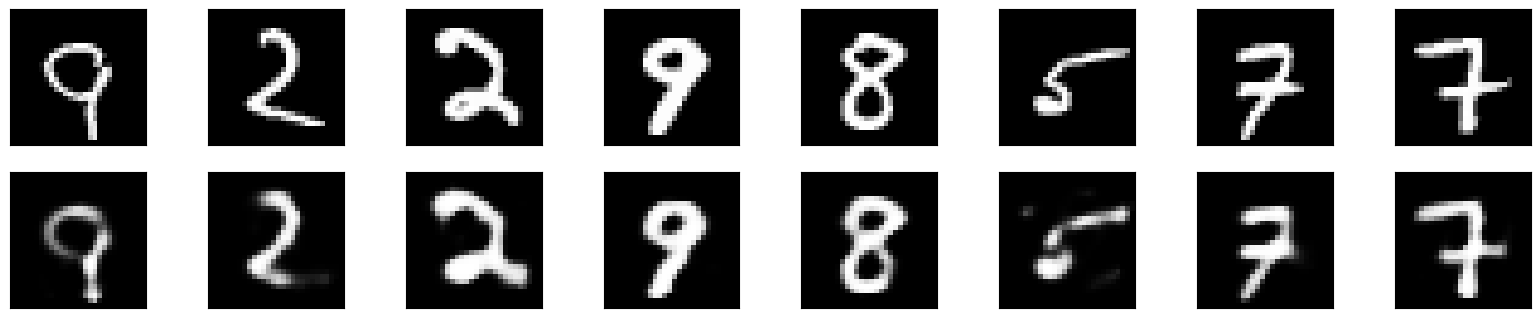

In [ ]:
# 손글씨 이미지와 복원된 이미지, 인코딩된 이미지 무작위 선택하여 비교
n = 8  # 몇 개의 이미지를 비교할지 설정

# 테스트 데이터 중에서 무작위로 n개의 이미지 선택
random_indices = np.random.randint(0, len(x_test), n)
selected_images = x_test[random_indices]

# 선택한 이미지에 대한 복원 이미지 및 인코딩된 이미지 계산
decoded_imgs = autoencoder.predict(selected_images)
encoded_imgs = encoder.predict(selected_images)

plt.figure(figsize=(20, 6))

for i in range(n):
    # 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

    """
    # 인코딩된 이미지
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))  # 인코딩 차원에 맞게 조정
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    """

1/1 [==============================] - 0s 24ms/step


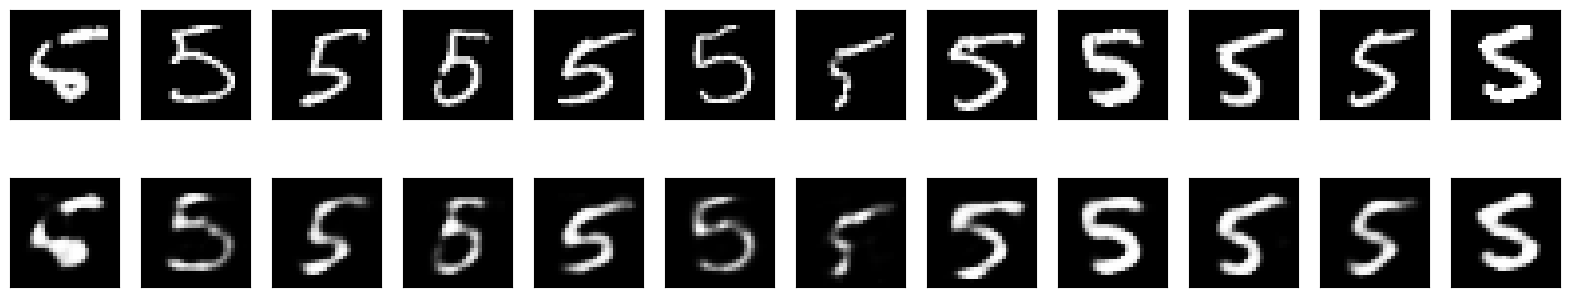

In [ ]:
# 특정한 숫자 선택
selected_number = 5  # 시각화하고 싶은 숫자 설정

# 해당 숫자에 대한 테스트 데이터 인덱스 추출
indices = np.where(y_test == selected_number)[0]

# 해당 숫자에 대한 이미지 추출
selected_images = x_test[indices]

# 복원된 이미지 계산
decoded_imgs = autoencoder.predict(selected_images)

# 원본 이미지와 복원 이미지 시각화
n = len(selected_images)
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# Stacked Autoencoder 모델 정의

encoding_dim = 64  # 인코딩 차원
input_img = Input(shape=(784,))
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded1)
decoded2 = Dense(128, activation='relu')(encoded2)
decoded1 = Dense(784, activation='sigmoid')(decoded2)

autoencoder = Model(input_img, decoded1)

# 모델 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 8s 14ms/step - loss: 0.1773 - val_loss: 0.1155
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.1069 - val_loss: 0.0982
Epoch 3/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0959 - val_loss: 0.0914
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0905 - val_loss: 0.0872
Epoch 5/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0870 - val_loss: 0.0846
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0846 - val_loss: 0.0826
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0828 - val_loss: 0.0820
Epoch 8/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0815 - val_loss: 0.0802
Epoch 9/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0804 - val_loss: 0.0794
Epoch 10/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0794 - val_lo

1/1 [==============================] - 0s 66ms/step


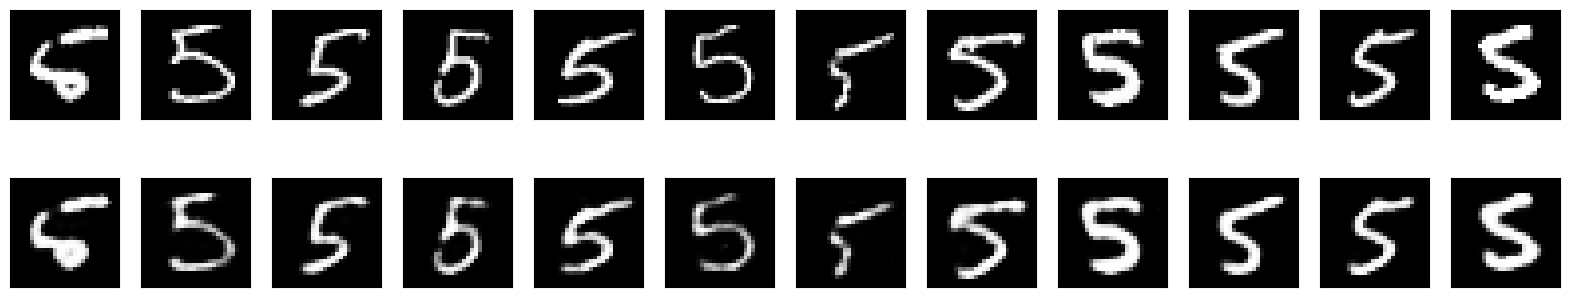

In [ ]:
# 특정한 숫자 선택
selected_number = 5  # 시각화하고 싶은 숫자 설정

# 해당 숫자에 대한 테스트 데이터 인덱스 추출
indices = np.where(y_test == selected_number)[0]

# 해당 숫자에 대한 이미지 추출
selected_images = x_test[indices]

# 복원된 이미지 계산
decoded_imgs = autoencoder.predict(selected_images)

# 원본 이미지와 복원 이미지 시각화
n = len(selected_images)
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# Denoising Autoencoder 모델 정의
encoding_dim = 64  # 인코딩 차원
input_img = Input(shape=(784,))
noisy_input = GaussianNoise(0.5)(input_img)  # 노이즈 추가
encoded = Dense(128, activation='relu')(noisy_input)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 0.1948 - val_loss: 0.1359
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.1355 - val_loss: 0.1131
Epoch 3/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1260 - val_loss: 0.1052
Epoch 4/30
469/469 [==============================] - 6s 14ms/step - loss: 0.1215 - val_loss: 0.1009
Epoch 5/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1183 - val_loss: 0.0969
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.1162 - val_loss: 0.0947
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.1146 - val_loss: 0.0931
Epoch 8/30
469/469 [==============================] - 8s 17ms/step - loss: 0.1135 - val_loss: 0.0925
Epoch 9/30
469/469 [==============================] - 7s 14ms/step - loss: 0.1125 - val_loss: 0.0911
Epoch 10/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1118 - val_lo

1/1 [==============================] - 0s 76ms/step


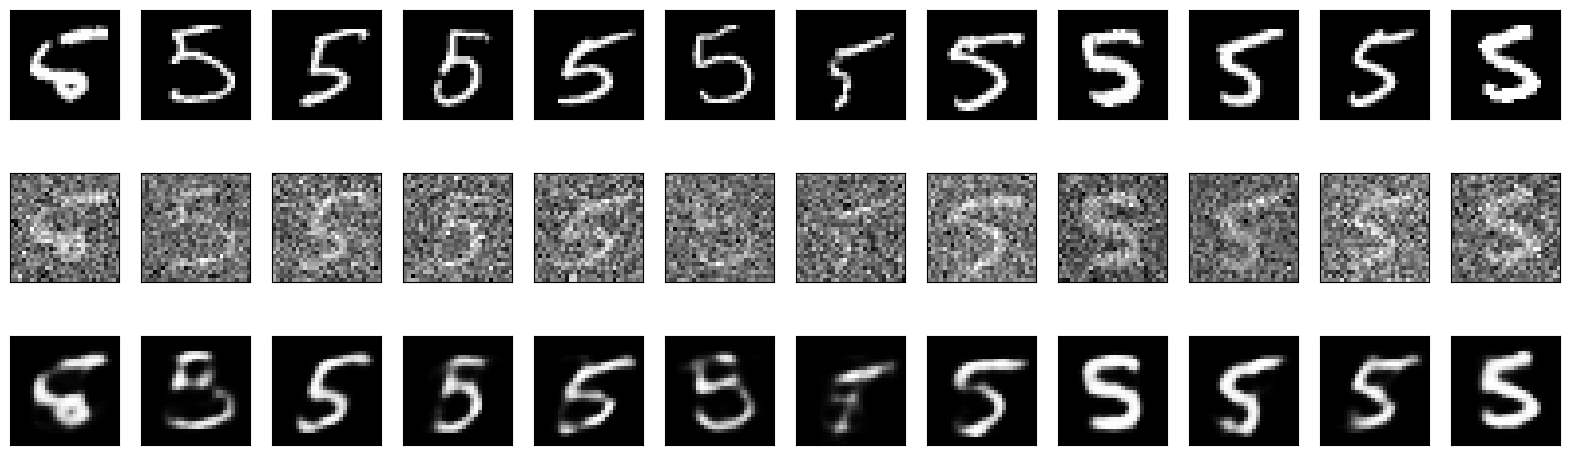

In [ ]:
# 특정한 숫자 선택
selected_number = 5  # 시각화하고 싶은 숫자 설정

# 해당 숫자에 대한 테스트 데이터 인덱스 추출
indices = np.where(y_test == selected_number)[0]

# 해당 숫자에 대한 이미지 추출
selected_images = x_test[indices]

# 노이즈 추가된 이미지
noisy_images = selected_images + np.random.normal(loc=0, scale=0.5, size=selected_images.shape)

# 복원된 이미지 계산
decoded_imgs = autoencoder.predict(noisy_images)

# 원본 이미지, 노이즈 추가된 이미지, 복원 이미지 시각화
n = len(selected_images)
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 추가된 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# Sparse Autoencoder 모델 정의

encoding_dim = 1568  # 인코딩 차원
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-4))(input_img)  # Sparse 제약 추가
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/30
235/235 [==============================] - 24s 100ms/step - loss: 0.2725 - val_loss: 0.1750
Epoch 2/30
235/235 [==============================] - 23s 98ms/step - loss: 0.1589 - val_loss: 0.1459
Epoch 3/30
235/235 [==============================] - 25s 108ms/step - loss: 0.1402 - val_loss: 0.1340
Epoch 4/30
235/235 [==============================] - 22s 95ms/step - loss: 0.1308 - val_loss: 0.1268
Epoch 5/30
235/235 [==============================] - 23s 100ms/step - loss: 0.1248 - val_loss: 0.1219
Epoch 6/30
235/235 [==============================] - 24s 104ms/step - loss: 0.1204 - val_loss: 0.1180
Epoch 7/30
235/235 [==============================] - 23s 99ms/step - loss: 0.1170 - val_loss: 0.1151
Epoch 8/30
235/235 [==============================] - 23s 99ms/step - loss: 0.1142 - val_loss: 0.1125
Epoch 9/30
235/235 [==============================] - 24s 100ms/step - loss: 0.1118 - val_loss: 0.1104
Epoch 10/30
235/235 [==============================] - 23s 99ms/step - loss: 

1/1 [==============================] - 0s 76ms/step


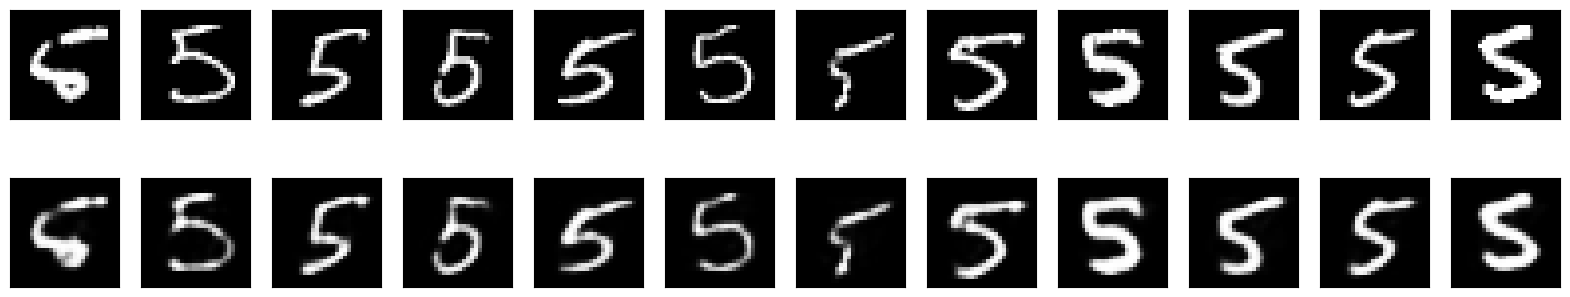

In [ ]:
# 특정한 숫자 선택
selected_number = 5  # 시각화하고 싶은 숫자 설정

# 해당 숫자에 대한 테스트 데이터 인덱스 추출
indices = np.where(y_test == selected_number)[0]

# 해당 숫자에 대한 이미지 추출
selected_images = x_test[indices]

# 복원된 이미지 계산
decoded_imgs = autoencoder.predict(selected_images)

# 원본 이미지와 복원 이미지 시각화
n = len(selected_images)
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# VAE 모델 정의
original_dim = 784
latent_dim = 64
intermediate_dim = 128

# 인코더
input_img = Input(shape=(original_dim,))
hidden = Dense(intermediate_dim, activation='relu')(input_img)
z_mean = Dense(latent_dim)(hidden)
z_log_var = Dense(latent_dim)(hidden)

# 잠재 공간 샘플링 함수
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# 잠재 공간 샘플링 레이어
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# 디코더
decoder_input = Input(shape=(latent_dim,))
decoder_hidden = Dense(intermediate_dim, activation='relu')(decoder_input)
decoded_output = Dense(original_dim, activation='sigmoid')(decoder_hidden)

# 인코더 모델, 디코더 모델 정의
encoder = Model(input_img, z)
decoder = Model(decoder_input, decoded_output)

# VAE 모델
vae_output = decoder(encoder(input_img))
vae = Model(input_img, vae_output)

# VAE 손실 함수 (Reconstruction Loss + KL Divergence)
reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(input_img, vae_output))
kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
vae_loss = reconstruction_loss + kl_loss

# 모델 컴파일 및 학습
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=30, batch_size=128, shuffle=True, validation_data=(x_test,))

Epoch 1/30
469/469 [==============================] - 10s 19ms/step - loss: 0.2909 - val_loss: 0.2642
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2630 - val_loss: 0.2615
Epoch 3/30
469/469 [==============================] - 7s 14ms/step - loss: 0.2616 - val_loss: 0.2608
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2609 - val_loss: 0.2596
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2598 - val_loss: 0.2587
Epoch 6/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2592 - val_loss: 0.2592
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.2589 - val_loss: 0.2581
Epoch 8/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2589 - val_loss: 0.2587
Epoch 9/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2588 - val_loss: 0.2580
Epoch 10/30
469/469 [==============================] - 7s 14ms/step - loss: 0.2586 - val_l

1/1 [==============================] - 0s 136ms/step


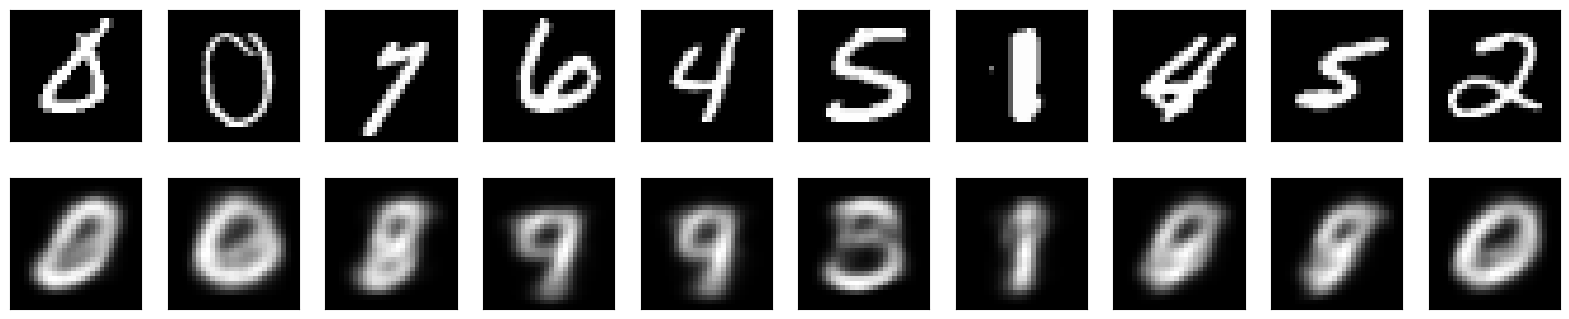

In [ ]:
# 원본 이미지와 복원된 이미지 비교 및 시각화
n = 10  # 비교할 이미지 개수
sampled_indices = np.random.randint(0, len(x_test), n)
sampled_images = x_test[sampled_indices]

# 복원된 이미지 계산
decoded_imgs = vae.predict(sampled_images)

plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sampled_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복원된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()